<a href="https://colab.research.google.com/github/sucheerarighthere/bsc_dpdm22/blob/main/%5Bdataprep%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

หาค่าทางสถิติ ของราคาทรัพย์ / หาความมั่นใจ / แยกนักประเมินสองคนออกมาก่อน 

In [4]:
import pandas as pd

In [5]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
home = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name='บ้าน')
home.head()
     

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [7]:
#หาค่าทางสถิติ ของราคาทรัพย์
home[['ราคาทรัพย์']].describe()

,ราคาทรัพย์
count,1.900000e+02
mean,4.280537e+06
std,2.787971e+06
min,3.900000e+05
25%,2.862750e+06
50%,3.995000e+06
75%,5.000000e+06
max,2.094900e+07


In [8]:
#frequency
freq = home[['ความมั่นใจในการเมินราคาทรัพย์']]
freq.value_counts()

ความมั่นใจในการเมินราคาทรัพย์
มั่นใจ                           189
ไม่มั่นใจ                          1
dtype: int64

In [9]:
a = home[['post id','ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ราคาทรัพย์','ให้คะแนนทรัพย์']]
a

,post id,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์,ให้คะแนนทรัพย์
0,https://nayoo.co/khonkaen/posts/25,1,มั่นใจ,2500000.0,2700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,https://nayoo.co/khonkaen/posts/25,2,มั่นใจ,2700000.0,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,https://nayoo.co/khonkaen/posts/33,1,มั่นใจ,2200000.0,2600000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,https://nayoo.co/khonkaen/posts/33,2,มั่นใจ,2400000.0,2600000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,https://nayoo.co/khonkaen/posts/495,1,มั่นใจ,5000000.0,5900000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,2,มั่นใจ,5000000.0,5500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
186,https://nayoo.co/khonkaen/posts/19496,2,มั่นใจ,7400000.0,7911000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
187,https://nayoo.co/khonkaen/posts/20,2,มั่นใจ,2500000.0,2000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
188,https://nayoo.co/khonkaen/posts/31,2,มั่นใจ,3900000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [10]:
u1c = a[a['ID ผู้ประเมิน']==1]
u1c.describe()

,ID ผู้ประเมิน,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
count,100.0,1.000000e+02,1.000000e+02
mean,1.0,3.938500e+06,4.316360e+06
std,0.0,2.368553e+06,2.865391e+06
min,1.0,6.000000e+05,3.900000e+05
25%,1.0,2.775000e+06,2.892750e+06
50%,1.0,3.600000e+06,3.962000e+06
75%,1.0,4.500000e+06,5.000000e+06
max,1.0,1.600000e+07,2.094900e+07


In [11]:
u1c['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [12]:
u2c = a[a['ID ผู้ประเมิน']==2]
u2c.describe()


,ID ผู้ประเมิน,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
count,90.0,8.900000e+01,9.000000e+01
mean,2.0,4.153258e+06,4.240733e+06
std,0.0,2.386901e+06,2.714815e+06
min,2.0,9.900000e+05,3.900000e+05
25%,2.0,2.600000e+06,2.860000e+06
50%,2.0,3.900000e+06,4.000000e+06
75%,2.0,4.900000e+06,5.000000e+06
max,2.0,1.700000e+07,2.094900e+07


In [13]:
u2c['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

#ตามอาจารย์


In [14]:
#สรุปคนแรกให้คะแนน
u1c['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [15]:
#สรุปคนที่สองให้คะแนน
u2c['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

In [16]:
u1c.groupby(['ให้คะแนนทรัพย์']).count()

,post id,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
ให้คะแนนทรัพย์,,,,,
1 ขายไม่ได้แน่นอน,1,1,1,1,1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,54,54,54,54,54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,43,43,43,43,43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2,2,2,2,2


**เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนของราคาตั้งขาย**


In [17]:
difference = home[['post id','ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ราคาทรัพย์']]
difference

,post id,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
0,https://nayoo.co/khonkaen/posts/25,1,มั่นใจ,2500000.0,2700000.0
1,https://nayoo.co/khonkaen/posts/25,2,มั่นใจ,2700000.0,2700000.0
2,https://nayoo.co/khonkaen/posts/33,1,มั่นใจ,2200000.0,2600000.0
3,https://nayoo.co/khonkaen/posts/33,2,มั่นใจ,2400000.0,2600000.0
4,https://nayoo.co/khonkaen/posts/495,1,มั่นใจ,5000000.0,5900000.0
...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,2,มั่นใจ,5000000.0,5500000.0
186,https://nayoo.co/khonkaen/posts/19496,2,มั่นใจ,7400000.0,7911000.0
187,https://nayoo.co/khonkaen/posts/20,2,มั่นใจ,2500000.0,2000000.0
188,https://nayoo.co/khonkaen/posts/31,2,มั่นใจ,3900000.0,4000000.0


In [18]:
d1 = difference[difference['ID ผู้ประเมิน']==1]
d1

,post id,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
0,https://nayoo.co/khonkaen/posts/25,1,มั่นใจ,2500000.0,2700000.0
2,https://nayoo.co/khonkaen/posts/33,1,มั่นใจ,2200000.0,2600000.0
4,https://nayoo.co/khonkaen/posts/495,1,มั่นใจ,5000000.0,5900000.0
6,https://nayoo.co/khonkaen/posts/564,1,มั่นใจ,3500000.0,4400000.0
8,https://nayoo.co/khonkaen/posts/566,1,มั่นใจ,2500000.0,2750000.0
...,...,...,...,...,...
155,https://nayoo.co/khonkaen/posts/19495,1,มั่นใจ,4500000.0,5500000.0
156,https://nayoo.co/khonkaen/posts/19496,1,มั่นใจ,5200000.0,7911000.0
157,https://nayoo.co/khonkaen/posts/20,1,มั่นใจ,3600000.0,2000000.0
158,https://nayoo.co/khonkaen/posts/31,1,มั่นใจ,4000000.0,4000000.0


In [19]:
d2 = difference[difference['ID ผู้ประเมิน']==2]
d2

,post id,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
1,https://nayoo.co/khonkaen/posts/25,2,มั่นใจ,2700000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2,มั่นใจ,2400000.0,2600000.0
5,https://nayoo.co/khonkaen/posts/495,2,มั่นใจ,9000000.0,5900000.0
7,https://nayoo.co/khonkaen/posts/564,2,มั่นใจ,3700000.0,4400000.0
9,https://nayoo.co/khonkaen/posts/566,2,มั่นใจ,2500000.0,2750000.0
...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,2,มั่นใจ,5000000.0,5500000.0
186,https://nayoo.co/khonkaen/posts/19496,2,มั่นใจ,7400000.0,7911000.0
187,https://nayoo.co/khonkaen/posts/20,2,มั่นใจ,2500000.0,2000000.0
188,https://nayoo.co/khonkaen/posts/31,2,มั่นใจ,3900000.0,4000000.0


ทำ histogram

In [20]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [21]:
from matplotlib import pyplot as plt

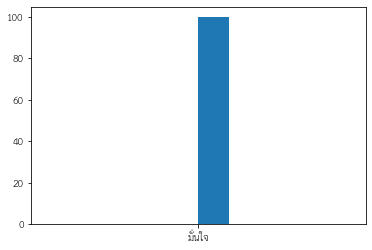

In [22]:
ret1_conf = plt.hist(u1c['ความมั่นใจในการเมินราคาทรัพย์']) #change uc1 to d1 that's fine

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

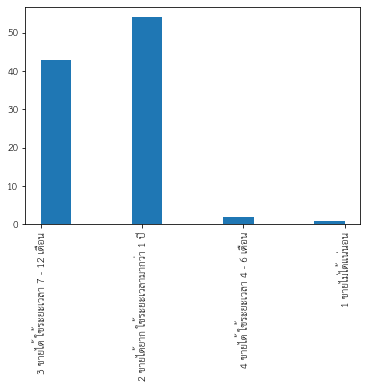

In [23]:
ret1_score = plt.hist(u1c['ให้คะแนนทรัพย์'])
plt.xticks(rotation='vertical')

#MAPE FORMULA

In [24]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [25]:
d1r = d1['ราคาทรัพย์']
d1e = d1['ประเมินราคาซื้อ-ขาย']
mape(d1r,d1e)

12.133451335450657

In [26]:
d2r = d2['ราคาทรัพย์']
d2e = d2['ประเมินราคาซื้อ-ขาย']
mape(d2r,d2e)

nan

## เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย

## ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ

### hint เริ่มต้นมาเราอยากได้ตารางรูปแบบนี้ก่อน
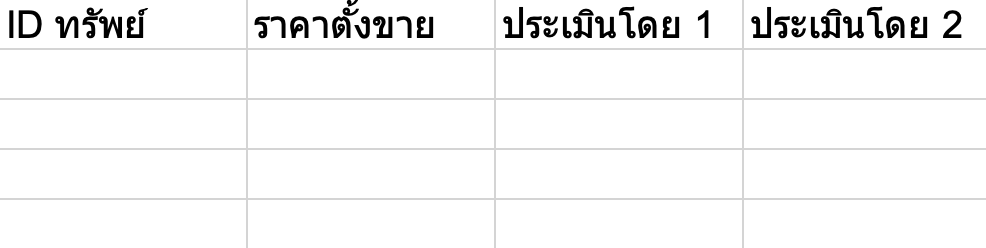


In [27]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [28]:
u2c['ประเมิน1'] = u2c['post id'].map(u1c.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
u2c

<ipython-input-28-5e0b3b3c362d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u2c['ประเมิน1'] = u2c['post id'].map(u1c.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,post id,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์,ให้คะแนนทรัพย์,ประเมิน1
1,https://nayoo.co/khonkaen/posts/25,2,มั่นใจ,2700000.0,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,https://nayoo.co/khonkaen/posts/33,2,มั่นใจ,2400000.0,2600000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
5,https://nayoo.co/khonkaen/posts/495,2,มั่นใจ,9000000.0,5900000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0
7,https://nayoo.co/khonkaen/posts/564,2,มั่นใจ,3700000.0,4400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
9,https://nayoo.co/khonkaen/posts/566,2,มั่นใจ,2500000.0,2750000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0
...,...,...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,2,มั่นใจ,5000000.0,5500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,4500000.0
186,https://nayoo.co/khonkaen/posts/19496,2,มั่นใจ,7400000.0,7911000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,5200000.0
187,https://nayoo.co/khonkaen/posts/20,2,มั่นใจ,2500000.0,2000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3600000.0
188,https://nayoo.co/khonkaen/posts/31,2,มั่นใจ,3900000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,4000000.0


In [29]:
u2c[['post id','ราคาทรัพย์']]

,post id,ราคาทรัพย์
1,https://nayoo.co/khonkaen/posts/25,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0
...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0


# วิธีทำ

## นำเข้าข้อมูลทั้งหมด

In [30]:
detachedhouse = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=0)
detachedhouse.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [31]:
land = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=1)
land.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,3000000.0,12000-18000,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN


In [32]:
condo = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=2)
condo.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000.0,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000.0,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [33]:
townhome = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=3)
townhome.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN


In [34]:
office = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=4)
office.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN


#สรุปข้อมูลนักประเมิน

## บ้านเดี่ยว

In [35]:
est1 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,4500000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
156,1,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,5200000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
157,1,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,3600000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
158,1,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,4000000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [36]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [37]:
est1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [38]:
est2 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==2]
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,NaN,NaN,NaN,NaN,NaN
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,5000000.0,"ราคาเสนอขาย 20,000-30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
186,2,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,7400000.0,"ราคาเสนอขาย 20,000 - 30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,ราคาเสนอขาย 2.2-3.0 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,3900000.0,ราคาเสนอขาย 3.5-4.0ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [39]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [40]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

ขั้นตอนเปรียบเทียบราคาที่นักประเมินทั้งสองประเมิน เอาคนที่สองตั้ง

In [41]:
est2['ประเมินโดย 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']); #เพิ่มราคาประเมินโดย1มาใส่ในตารางest2
est2

<ipython-input-41-94b67783757c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมินโดย 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']); #เพิ่มราคาประเมินโดย1มาใส่ในตารางest2


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,NaN,NaN,NaN,NaN,NaN,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,5000000.0,"ราคาเสนอขาย 20,000-30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,4500000.0
186,2,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,7400000.0,"ราคาเสนอขาย 20,000 - 30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,5200000.0
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,ราคาเสนอขาย 2.2-3.0 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,3600000.0
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,3900000.0,ราคาเสนอขาย 3.5-4.0ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,4000000.0


In [42]:
est2['ประเมินโดย 2'] = est2['post id'].map(est2.set_index('post id')['ประเมินราคาซื้อ-ขาย']); #add column
est2

<ipython-input-42-9289dc6e2a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมินโดย 2'] = est2['post id'].map(est2.set_index('post id')['ประเมินราคาซื้อ-ขาย']); #add column


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมินโดย 1,ประเมินโดย 2
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0,2700000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2200000.0,2400000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,NaN,NaN,NaN,NaN,NaN,5000000.0,9000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,3500000.0,3700000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,5000000.0,"ราคาเสนอขาย 20,000-30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,4500000.0,5000000.0
186,2,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,7400000.0,"ราคาเสนอขาย 20,000 - 30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,5200000.0,7400000.0
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,ราคาเสนอขาย 2.2-3.0 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,3600000.0,2500000.0
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,3900000.0,ราคาเสนอขาย 3.5-4.0ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,4000000.0,3900000.0


In [43]:
table1 = est2[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table1

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [44]:
table1 = table1.fillna(value={'ประเมินโดย 2':est2['ประเมินโดย 2'].mean()}) #finding for missing
table1

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [45]:
table1.isnull() #make sure tht's have no missing

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,False,False,False,False
3,False,False,False,False
5,False,False,False,False
7,False,False,False,False
9,False,False,False,False
...,...,...,...,...
185,False,False,False,False
186,False,False,False,False
187,False,False,False,False
188,False,False,False,False


In [46]:
r1 = table1['ราคาทรัพย์'] #real price table1
be1 = table1['ประเมินโดย 1'] # by estimator 1
ma1 = mape(r1, be1)

In [47]:
be2 = table1['ประเมินโดย 2']
ma2 = mape(r1, be2)
mape = mape(be2,be1)

In [48]:
mape

0.1154689965085877

In [49]:
print(f'ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ {ma1} \nค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ {ma2}')

ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ 0.12295717665618242 
ค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ 0.10490099814372758


ค่า mape ที่ประเมินโดย 2 มีค่าน้อยกว่า คนที่ 1 หมายถึง คนที่สองประเมินราคาทรัพย์ได้ใกล้เคียงมากกว่าคนที่ 1

##ที่ดิน

In [50]:
est1_land = land[land['ID ผู้ประเมิน']==1]
est1_land

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,100.0
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,18000000.0,"8,000-35,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
9,1,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,35000000.0,"15,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
12,1,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2200000.0,"10,000-20,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"800-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
203,1,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,500000.0,"3,000-25,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
205,1,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2000000.0,"500-15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
207,1,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"500-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [51]:
est2_land = land[land['ID ผู้ประเมิน']==2]
est2_land

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [52]:
est2_land['ประเมินโดย 1'] = est2_land['post id'].map(est1_land.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_land

<ipython-input-52-1de716d3cecb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_land['ประเมินโดย 1'] = est2_land['post id'].map(est1_land.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,2200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,4000000.0
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,500000.0
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,2000000.0
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1500000.0


In [53]:
est2_land['ประเมินโดย 2'] = est2_land['post id'].map(est2_land.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_land

<ipython-input-53-2e0d3157cee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_land['ประเมินโดย 2'] = est2_land['post id'].map(est2_land.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมินโดย 1,ประเมินโดย 2
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,1800000.0,2000000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,8000000.0,12000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,18000000.0,70000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,35000000.0,60000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,2200000.0,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,4000000.0,4000000.0
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,500000.0,750000.0
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,2000000.0,2500000.0
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1500000.0,1500000.0


In [54]:
table2 = est2_land[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table2

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [55]:
table2 = table2.fillna(value={'ประเมินโดย 2':est2_land['ประเมินโดย 2'].mean()})
table2

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [56]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [57]:
r2 = table2['ราคาทรัพย์'] 
be1land = table2['ประเมินโดย 1']
ma1l = mape(r2, be1land)
#ประกาศตัวแปรแบบข้อที่แล้ว

In [58]:
price2 = table2['ราคาทรัพย์']
p_est1_land = table2['ประเมินโดย 1']
ma02 = mape(price2, p_est1_land)

In [59]:
p_est2_land = table2['ประเมินโดย 2']
ma002 = mape(price2, p_est2_land)
mape2 = mape(p_est2_land,p_est1_land)

In [60]:
mape2

42.74775082762699

**สรุป**
จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 2 มีค่าน้อยกว่าคนที่ 1

ดังนั้น การประเมินโดยคนที่ 2 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่ 1

##คอนโด
คนที่2ไม่ได้ประเมินคอนโด

In [61]:
est1_condo = condo[condo['ID ผู้ประเมิน']==1]
est1_condo

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000.0,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000.0,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,1,1609.0,คอนโด,มั่นใจ,1490000.0,1500000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,1640.0,คอนโด,มั่นใจ,1280000.0,1600000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,1,1641.0,คอนโด,มั่นใจ,4290000.0,2700000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน
8,1,1650.0,คอนโด,มั่นใจ,1700000.0,1550000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,1840.0,คอนโด,มั่นใจ,3790000.0,2800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [62]:
est1_condo.rename(columns={'ประเมินราคาซื้อ-ขาย':'ประเมินโดย 1'}, inplace=True)

In [63]:
table3 = est1_condo[['post id','ราคาทรัพย์','ประเมินโดย 1']]
table3

,post id,ราคาทรัพย์,ประเมินโดย 1
0,32.0,3500000.0,3500000.0
1,36.0,1930000.0,2200000.0
2,603.0,2438000.0,2800000.0
3,1395.0,1600000.0,2300000.0
4,1443.0,1860000.0,1800000.0
5,1609.0,1490000.0,1500000.0
6,1640.0,1280000.0,1600000.0
7,1641.0,4290000.0,2700000.0
8,1650.0,1700000.0,1550000.0
9,1840.0,3790000.0,2800000.0


In [64]:
table3.isnull()

,post id,ราคาทรัพย์,ประเมินโดย 1
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [65]:
price3 = table3['ราคาทรัพย์']
p_est1_condo = table3['ประเมินโดย 1']
ma03 = mape(price3, p_est1_condo)

In [66]:
print(f'ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ {ma03}')

ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ 17.34926594625026


## ทาวโฮม

In [67]:
est1_townhome = townhome[townhome['ID ผู้ประเมิน']==1]
est1_townhome

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000.0,3500000.0,"8,000-80,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
8,1,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,990000.0,1000000.0,"8,000-80,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1430000.0,1000000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
126,1,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1980000.0,1500000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
127,1,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000.0,1600000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
128,1,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000.0,1600000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [68]:
est2_townhome = townhome[townhome['ID ผู้ประเมิน']==2]
est2_townhome

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000.0,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,990000.0,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1430000.0,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1980000.0,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000.0,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000.0,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [69]:
est2_townhome['ประเมินโดย 1'] = est2_townhome['post id'].map(est1_townhome.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_townhome

<ipython-input-69-c94765b83e77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_townhome['ประเมินโดย 1'] = est2_townhome['post id'].map(est1_townhome.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000.0,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,990000.0,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1430000.0,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1980000.0,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1500000.0
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000.0,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000.0,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0


In [70]:
est2_townhome['ประเมินโดย 2'] = est2_townhome['post id'].map(est2_townhome.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_townhome

<ipython-input-70-73009d640093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_townhome['ประเมินโดย 2'] = est2_townhome['post id'].map(est2_townhome.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมินโดย 1,ประเมินโดย 2
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0,1500000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0,1500000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0,4000000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000.0,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0,3200000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,990000.0,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0,800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1430000.0,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0,1200000.0
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1980000.0,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1500000.0,1700000.0
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000.0,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0,1900000.0
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000.0,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0,1700000.0


In [71]:
table4 = est2_townhome[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table4

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0


In [72]:
table4 = table4.fillna(value={'ประเมินโดย 2':est2_townhome['ประเมินโดย 2'].mean()})
table4

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0


In [73]:
table4.isnull()

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,False,False,False,False
3,False,False,False,False
5,False,False,False,False
7,False,False,False,False
9,False,False,False,False
...,...,...,...,...
235,False,False,False,False
236,False,False,False,False
237,False,False,False,False
238,False,False,False,False


In [74]:
price4 = table4['ราคาทรัพย์']
p_est1_townhome = table4['ประเมินโดย 1']
ma04 = mape(price4, p_est1_townhome)

In [75]:
p_est2_townhome = table4['ประเมินโดย 2']
ma004 = mape(price4, p_est2_townhome)
mape4 = mape(p_est2_townhome,p_est1_townhome)

In [76]:
mape4 

10.619748830198178

In [77]:
print(f'ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ {ma04} \nค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ {ma004}')

ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ 11.373507980201532 
ค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ 8.766742521930592


สรุป จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 2 มีค่าน้อยกว่าคนที่ 1

ดังนั้น การประเมินโดยคนที่ 2 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่ 1

## อาคารพาณิชย์

In [78]:
est1_office = office[office['ID ผู้ประเมิน']==1]
est1_office

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,"8,000-60,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
8,1,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,2200000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
10,1,https://nayoo.co/khonkaen/posts/30,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4800000.0,3600000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
12,1,https://nayoo.co/khonkaen/posts/35,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2400000.0,2500000.0,"8,000-80,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN
14,1,https://nayoo.co/khonkaen/posts/497,อาคารพาณิชย์/สำนักงาน,มั่นใจ,5000000.0,3800000.0,"8,000-40,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
16,1,https://nayoo.co/khonkaen/posts/498,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,7000000.0,"15,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
18,1,https://nayoo.co/khonkaen/posts/499,อาคารพาณิชย์/สำนักงาน,มั่นใจ,9000000.0,8000000.0,"8,000-80,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN


In [79]:
est2_office = office[office['ID ผู้ประเมิน']==2]
est2_office

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
11,2,https://nayoo.co/khonkaen/posts/30,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4800000.0,4000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/ คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
13,2,https://nayoo.co/khonkaen/posts/35,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2400000.0,2100000.0,ราคาเสนอขาย 2-2.5 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
15,2,https://nayoo.co/khonkaen/posts/497,อาคารพาณิชย์/สำนักงาน,มั่นใจ,5000000.0,5000000.0,ราคาเสนอขาย 5 - 7 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
17,2,https://nayoo.co/khonkaen/posts/498,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,ราคาเสนอขาย 8-10 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN
19,2,https://nayoo.co/khonkaen/posts/499,อาคารพาณิชย์/สำนักงาน,มั่นใจ,9000000.0,10000000.0,ราคาเสนอขาย 5-6 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN


In [80]:
est2_office['ประเมินโดย 1'] = est2_office['post id'].map(est1_office.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_office

<ipython-input-80-96964ddc3347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_office['ประเมินโดย 1'] = est2_office['post id'].map(est1_office.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN,13500000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,2200000.0
11,2,https://nayoo.co/khonkaen/posts/30,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4800000.0,4000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/ คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,3600000.0
13,2,https://nayoo.co/khonkaen/posts/35,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2400000.0,2100000.0,ราคาเสนอขาย 2-2.5 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,2500000.0
15,2,https://nayoo.co/khonkaen/posts/497,อาคารพาณิชย์/สำนักงาน,มั่นใจ,5000000.0,5000000.0,ราคาเสนอขาย 5 - 7 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,3800000.0
17,2,https://nayoo.co/khonkaen/posts/498,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,ราคาเสนอขาย 8-10 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN,7000000.0
19,2,https://nayoo.co/khonkaen/posts/499,อาคารพาณิชย์/สำนักงาน,มั่นใจ,9000000.0,10000000.0,ราคาเสนอขาย 5-6 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,8000000.0


In [81]:
est2_office['ประเมินโดย 2'] = est2_office['post id'].map(est2_office.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_office

<ipython-input-81-97e4cc7a5de5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_office['ประเมินโดย 2'] = est2_office['post id'].map(est2_office.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมินโดย 1,ประเมินโดย 2
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,6000000.0,8000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,12000000.0,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN,13500000.0,20000000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,4000000.0,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,2200000.0,3000000.0
11,2,https://nayoo.co/khonkaen/posts/30,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4800000.0,4000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/ คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,3600000.0,4000000.0
13,2,https://nayoo.co/khonkaen/posts/35,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2400000.0,2100000.0,ราคาเสนอขาย 2-2.5 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,2500000.0,2100000.0
15,2,https://nayoo.co/khonkaen/posts/497,อาคารพาณิชย์/สำนักงาน,มั่นใจ,5000000.0,5000000.0,ราคาเสนอขาย 5 - 7 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,3800000.0,5000000.0
17,2,https://nayoo.co/khonkaen/posts/498,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,ราคาเสนอขาย 8-10 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN,7000000.0,8000000.0
19,2,https://nayoo.co/khonkaen/posts/499,อาคารพาณิชย์/สำนักงาน,มั่นใจ,9000000.0,10000000.0,ราคาเสนอขาย 5-6 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,8000000.0,10000000.0


In [82]:
table5 = est2_office[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table5

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [83]:
table5 = table5.fillna(value={'ประเมินโดย 2':est2_office['ประเมินโดย 2'].mean()})
table5

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [84]:
table5.isnull()

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,False,False,False,False
3,False,False,False,False
5,False,False,False,False
7,False,False,False,False
9,False,False,False,False
11,False,False,False,False
13,False,False,False,False
15,False,False,False,False
17,False,False,False,False
19,False,False,False,False


In [85]:
price5 = table5['ราคาทรัพย์']
p_est1_office = table5['ประเมินโดย 1']
ma05 = mape(price5, p_est1_office)

In [86]:
p_est2_office = table5['ประเมินโดย 2']
ma005 = mape(price5, p_est2_office)
mape5 = mape(p_est2_office,p_est1_office)

In [87]:
mape5 

16.97142857142857

In [88]:
print(f'ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ {ma05} \nค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ {ma005}')

ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ 17.643894993894996 
ค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ 11.732295482295482


สรุป จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 2 มีค่าน้อยกว่าคนที่ 1

ดังนั้น การประเมินโดยคนที่ 2 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่ 1

#เขียน funtion ตรวจสอบค่าที่เติม 0 ผิด

In [89]:
table1 = est2[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table1

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [90]:
def check(in1,in2) :
    return max(in1/in2,in2/in1)
    #เลือกเอาค่าที่มใากที่สุดไม่ว่าจะเอาตัวไหนตั้งหรือเอาตัวไหนหาร
    #ถ้าเติมศูนย์พลาดไปหนึ่งตัวความต่างจากการประเมินน่าจะห่าง 10 เท่า 

In [91]:
check(100,12)

8.333333333333334

In [92]:
check(100,1200)

12.0

In [93]:
check1 = list()
for row in table1.iterrows():
  check1.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check1

[1.08,
 1.1818181818181819,
 1.18,
 1.2571428571428571,
 1.1,
 1.271111111111111,
 1.36,
 1.0153846153846153,
 1.3684,
 1.031941031941032,
 1.0476190476190477,
 1.1785714285714286,
 1.0592592592592593,
 1.188,
 1.1275,
 1.1,
 1.1157142857142857,
 1.0371428571428571,
 1.0588235294117647,
 1.2571428571428571,
 1.13125,
 1.0,
 1.0888888888888888,
 1.0892333472978635,
 1.0444444444444445,
 1.0,
 1.0434782608695652,
 1.02,
 1.25,
 1.13,
 1.0714285714285714,
 1.0,
 1.0,
 1.3833333333333333,
 1.03125,
 1.1611111111111112,
 1.0526315789473684,
 1.5384615384615385,
 1.0227272727272727,
 1.1363636363636365,
 1.1111111111111112,
 1.1290322580645162,
 1.1388888888888888,
 1.0,
 1.0933333333333333,
 1.3093125,
 1.21,
 1.24,
 1.1642857142857144,
 1.1,
 1.4685314685314685,
 1.1111111111111112,
 1.1942857142857144,
 1.0714285714285714,
 1.0710526315789475,
 1.4575,
 1.046,
 1.09375,
 1.044932079414838,
 1.1090909090909091,
 1.1333333333333333,
 1.1866666666666668,
 1.036,
 1.0031347962382444,
 1.06060

In [94]:
check2 = list()
for row in table1.iterrows():
  check2.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 2']))
check2

[1.0,
 1.0833333333333333,
 1.5254237288135593,
 1.1891891891891893,
 1.1,
 1.0314685314685315,
 1.050420168067227,
 1.0416666666666667,
 1.1403333333333334,
 1.0175,
 1.0476190476190477,
 1.03125,
 1.0214285714285714,
 1.0607142857142857,
 1.025,
 1.0607142857142857,
 1.0847222222222221,
 1.0371428571428571,
 1.0,
 1.125,
 1.1049723756906078,
 1.1904761904761905,
 1.0888888888888888,
 1.0054461667364893,
 1.0425531914893618,
 1.125,
 1.0434782608695652,
 1.0364145658263306,
 1.0,
 1.0324483775811208,
 1.04,
 1.2,
 1.04,
 1.1318181818181818,
 1.0,
 1.045,
 1.0526315789473684,
 3.3333333333333335,
 1.0227272727272727,
 1.04,
 1.08,
 1.2903225806451613,
 1.1219512195121952,
 1.125,
 1.2195121951219512,
 1.2322941176470588,
 1.0755555555555556,
 1.1366666666666667,
 1.0736196319018405,
 1.1,
 1.048951048951049,
 1.1111111111111112,
 1.045,
 1.0666666666666667,
 1.0435897435897437,
 1.4575,
 1.046,
 1.0857142857142856,
 1.1484,
 1.1090909090909091,
 1.0408163265306123,
 1.1125,
 1.036,
 1.

In [95]:
table1['check1'] = check1
table1['check2'] = check2
table1

<ipython-input-95-77ae4f2d67f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table1['check1'] = check1
<ipython-input-95-77ae4f2d67f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table1['check2'] = check2


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0,1.222222,1.100000
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [96]:
table1.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check1,check2
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
177,https://nayoo.co/khonkaen/posts/19450,2100000.0,3200000.0,2200000.0,1.523810,1.047619
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
101,https://nayoo.co/khonkaen/posts/6010,2860000.0,4200000.0,3000000.0,1.468531,1.048951
...,...,...,...,...,...,...
43,https://nayoo.co/khonkaen/posts/1128,4200000.0,4200000.0,5000000.0,1.000000,1.190476
87,https://nayoo.co/khonkaen/posts/3905,1200000.0,1200000.0,1350000.0,1.000000,1.125000
65,https://nayoo.co/khonkaen/posts/2143,5200000.0,5200000.0,5000000.0,1.000000,1.040000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [97]:
table1.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check1,check2
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
111,https://nayoo.co/khonkaen/posts/6045,2915000.0,2000000.0,2000000.0,1.457500,1.457500
83,https://nayoo.co/khonkaen/posts/3721,3100000.0,3500000.0,4000000.0,1.129032,1.290323
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
...,...,...,...,...,...,...
69,https://nayoo.co/khonkaen/posts/2262,3200000.0,3300000.0,3200000.0,1.031250,1.000000
57,https://nayoo.co/khonkaen/posts/1895,1200000.0,1500000.0,1200000.0,1.250000,1.000000
37,https://nayoo.co/khonkaen/posts/760,1800000.0,1700000.0,1800000.0,1.058824,1.000000
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000


##บ้านเดี่ยว

In [98]:
table2 = est2_land[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table2

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [99]:
check12 = list()
for row in table2.iterrows():
  check12.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check12

[1.5555555555555556,
 1.8625,
 5.0,
 1.8571428571428572,
 1.3636363636363635,
 1.5,
 4.714285714285714,
 1.1363636363636365,
 1.6,
 1.1964285714285714,
 1.2,
 1.2,
 1.125,
 1.1666666666666667,
 1.0476190476190477,
 1.2105263157894737,
 1.2,
 1.1666666666666667,
 10.208333333333334,
 1.35,
 1.1428571428571428,
 1.1,
 1.411764705882353,
 1.5,
 11.428571428571429,
 1.2515644555694618,
 2.25,
 1.4074074074074074,
 3.8916666666666666,
 1.25,
 4.0,
 1.2,
 2.5,
 1.2727272727272727,
 1.0204081632653061,
 1.2666666666666666,
 1.0833333333333333,
 1.0416666666666667,
 2.5,
 1.2882882882882882,
 1.6666666666666667,
 1.1111111111111112,
 1.25,
 1.2363636363636363,
 1.2857142857142858,
 1.0101010101010102,
 1.8125,
 2.8857142857142857,
 1.39,
 1.3,
 1.39,
 12.307692307692308,
 1.2380952380952381,
 1.25,
 1.29,
 1.481111111111111,
 1.0,
 1.4285714285714286,
 1.2761363636363636,
 1.0968333333333333,
 1.0,
 2.25,
 1.1764705882352942,
 1.1346153846153846,
 1.25,
 1.1875,
 1.5833333333333333,
 1.0625,
 

In [100]:
check22 = list()
for row in table2.iterrows():
  check22.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 2']))
check22

[1.4,
 1.2416666666666667,
 1.2857142857142858,
 1.0833333333333333,
 1.2,
 1.2,
 1.2692307692307692,
 1.1363636363636365,
 1.2,
 1.1166666666666667,
 1.3333333333333333,
 1.0909090909090908,
 2.8125,
 1.0,
 1.0606060606060606,
 1.9166666666666667,
 1.0416666666666667,
 1.0285714285714285,
 13.61111111111111,
 1.9285714285714286,
 1.1111111111111112,
 1.1,
 1.1764705882352942,
 1.25,
 14.545454545454545,
 1.0012515644555695,
 1.1111111111111112,
 1.35,
 1.0377777777777777,
 1.25,
 1.1666666666666667,
 1.2,
 1.1904761904761905,
 1.12,
 1.225,
 1.2666666666666666,
 1.2,
 1.2,
 1.1363636363636365,
 1.144,
 1.2,
 1.1627906976744187,
 1.0666666666666667,
 1.0588235294117647,
 1.2352941176470589,
 1.2375,
 1.16,
 1.01,
 1.1583333333333334,
 1.0833333333333333,
 1.1583333333333334,
 1.3,
 1.0476190476190477,
 1.0714285714285714,
 1.075,
 1.333,
 1.0769230769230769,
 1.25,
 1.40375,
 1.0968333333333333,
 1.1363636363636365,
 1.125,
 1.0625,
 1.18,
 1.25,
 1.0555555555555556,
 1.266666666666666

In [101]:
table2['check12'] = check12
table2['check22'] = check22
table2

<ipython-input-101-59d32e5afa06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2['check12'] = check12
<ipython-input-101-59d32e5afa06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2['check22'] = check22


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check12,check22
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556,1.400000
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,1.862500,1.241667
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,1.857143,1.083333
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,1.363636,1.200000
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,1.325000,1.060000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


In [102]:
table2.sort_values(by=['check12'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check12,check22
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
58,https://nayoo.co/khonkaen/posts/9203,160000000,14000000.0,11000000.0,11.428571,14.545455
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
100,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
122,https://nayoo.co/khonkaen/posts/12762,650000,650000.0,700000.0,1.000000,1.076923


In [103]:
table2.sort_values(by=['check22'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check12,check22
58,https://nayoo.co/khonkaen/posts/9203,160000000,14000000.0,11000000.0,11.428571,14.545455
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
158,https://nayoo.co/khonkaen/posts/6732,3500000,2800000.0,3500000.0,1.250000,1.000000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000


## คอนโด

In [104]:
table3 = est1_condo[['post id','ราคาทรัพย์','ประเมินโดย 1']]
table3

,post id,ราคาทรัพย์,ประเมินโดย 1
0,32.0,3500000.0,3500000.0
1,36.0,1930000.0,2200000.0
2,603.0,2438000.0,2800000.0
3,1395.0,1600000.0,2300000.0
4,1443.0,1860000.0,1800000.0
5,1609.0,1490000.0,1500000.0
6,1640.0,1280000.0,1600000.0
7,1641.0,4290000.0,2700000.0
8,1650.0,1700000.0,1550000.0
9,1840.0,3790000.0,2800000.0


In [105]:
check13 = list()
for row in table3.iterrows():
  check13.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check13

[1.0,
 1.1398963730569949,
 1.1484823625922889,
 1.4375,
 1.0333333333333334,
 1.0067114093959733,
 1.25,
 1.5888888888888888,
 1.096774193548387,
 1.3535714285714286]

In [106]:
table3['check13'] = check13
table3

<ipython-input-106-761d1b0e9ee5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table3['check13'] = check13


,post id,ราคาทรัพย์,ประเมินโดย 1,check13
0,32.0,3500000.0,3500000.0,1.000000
1,36.0,1930000.0,2200000.0,1.139896
2,603.0,2438000.0,2800000.0,1.148482
3,1395.0,1600000.0,2300000.0,1.437500
4,1443.0,1860000.0,1800000.0,1.033333
5,1609.0,1490000.0,1500000.0,1.006711
6,1640.0,1280000.0,1600000.0,1.250000
7,1641.0,4290000.0,2700000.0,1.588889
8,1650.0,1700000.0,1550000.0,1.096774
9,1840.0,3790000.0,2800000.0,1.353571


In [107]:
table3.sort_values(by=['check13'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,check13
7,1641.0,4290000.0,2700000.0,1.588889
3,1395.0,1600000.0,2300000.0,1.437500
9,1840.0,3790000.0,2800000.0,1.353571
6,1640.0,1280000.0,1600000.0,1.250000
2,603.0,2438000.0,2800000.0,1.148482
1,36.0,1930000.0,2200000.0,1.139896
8,1650.0,1700000.0,1550000.0,1.096774
4,1443.0,1860000.0,1800000.0,1.033333
5,1609.0,1490000.0,1500000.0,1.006711
0,32.0,3500000.0,3500000.0,1.000000


## ทาวน์โฮม

In [108]:
 table4 = est2_townhome[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table4

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0


In [109]:
check14 = list()
for row in table4.iterrows():
  check14.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check14

[1.4928571428571429,
 1.3357142857142856,
 1.0057142857142858,
 1.1,
 1.0101010101010102,
 1.0371428571428571,
 1.0330578512396693,
 1.144,
 1.3138888888888889,
 1.1363636363636365,
 1.1,
 1.144,
 1.5052631578947369,
 1.0083333333333333,
 1.0476190476190477,
 1.375,
 1.0266666666666666,
 1.05,
 1.287,
 1.1560693641618498,
 1.1,
 1.322314049586777,
 1.048951048951049,
 1.1,
 1.12,
 1.1428571428571428,
 1.0666666666666667,
 1.0119047619047619,
 1.1083333333333334,
 1.037037037037037,
 1.040909090909091,
 1.08,
 1.2222222222222223,
 1.0416666666666667,
 1.036,
 1.1538461538461537,
 1.1235955056179776,
 1.04,
 1.0502283105022832,
 1.079136690647482,
 1.02,
 1.0714285714285714,
 1.00625,
 1.0714285714285714,
 1.25,
 1.12,
 1.2,
 1.0040160642570282,
 1.1510791366906474,
 1.0391304347826087,
 1.0681818181818181,
 1.1428571428571428,
 1.0833333333333333,
 1.07,
 1.46,
 1.125,
 6.257142857142857,
 1.0588235294117647,
 1.0526315789473684,
 1.1071428571428572,
 1.6133333333333333,
 1.136363636363

In [110]:
check24 = list()
for row in table4.iterrows():
  check24.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 2']))
check24

[1.4354066985645932,
 1.6042780748663101,
 1.1363636363636365,
 1.203125,
 1.2375,
 1.134375,
 1.1,
 1.144,
 1.1825,
 1.0620689655172413,
 1.1,
 1.144,
 1.43,
 1.0371428571428571,
 1.1,
 1.375,
 1.0266666666666666,
 1.05,
 1.0725,
 1.4450867052023122,
 1.1,
 1.0743801652892562,
 1.1916666666666667,
 1.03125,
 1.12,
 1.0294117647058822,
 1.0666666666666667,
 1.0119047619047619,
 1.1083333333333334,
 1.037037037037037,
 1.0043668122270741,
 1.0,
 1.0,
 1.04,
 1.036,
 1.0833333333333333,
 1.0112359550561798,
 1.0,
 1.004566210045662,
 1.0692307692307692,
 1.0784313725490196,
 1.0714285714285714,
 1.00625,
 1.0357142857142858,
 1.0,
 1.0357142857142858,
 1.0416666666666667,
 1.0826086956521739,
 1.0692307692307692,
 1.0391304347826087,
 1.0217391304347827,
 1.0294117647058822,
 1.0,
 1.1214953271028036,
 1.004566210045662,
 1.0,
 5.475,
 1.0,
 1.0,
 1.0333333333333334,
 1.6133333333333333,
 1.0,
 1.045,
 1.4666666666666666,
 1.065625,
 1.0692307692307692,
 1.0294117647058822,
 1.1333333333

In [111]:
table4['check14'] = check14
table4['check24'] = check24
table4

<ipython-input-111-9db1c81be08f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table4['check14'] = check14
<ipython-input-111-9db1c81be08f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table4['check24'] = check24


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check14,check24
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0,1.005714,1.136364
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0,1.010101,1.237500
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0,1.430000,1.191667
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0,1.320000,1.164706
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0,1.118750,1.052941


In [112]:
table4.sort_values(by=['check14'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check14,check24
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
132,https://nayoo.co/khonkaen/posts/619,1430000.0,950000.0,1000000.0,1.505263,1.430000
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
174,https://nayoo.co/khonkaen/posts/3478,2190000.0,1500000.0,2200000.0,1.460000,1.004566
...,...,...,...,...,...,...
228,https://nayoo.co/khonkaen/posts/17923,1990000.0,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000.0,2500000.0,2300000.0,1.004016,1.082609
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
200,https://nayoo.co/khonkaen/posts/13411,3200000.0,3200000.0,3200000.0,1.000000,1.000000


In [113]:
table4.sort_values(by=['check24'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check14,check24
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,3000000.0,2800000.0,1500000.0,1.071429,2.000000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
225,https://nayoo.co/khonkaen/posts/17742,2500000.0,2200000.0,1700000.0,1.136364,1.470588
...,...,...,...,...,...,...
188,https://nayoo.co/khonkaen/posts/8101,3200000.0,3300000.0,3200000.0,1.031250,1.000000
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
199,https://nayoo.co/khonkaen/posts/12957,1500000.0,1600000.0,1500000.0,1.066667,1.000000
151,https://nayoo.co/khonkaen/posts/1978,2500000.0,2700000.0,2500000.0,1.080000,1.000000


## อาคารพาณิชย์

In [114]:
table5 = est2_office[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table5

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [115]:
check15 = list()
for row in table5.iterrows():
  check15.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check15

[1.1666666666666667,
 1.0,
 1.6666666666666667,
 1.1428571428571428,
 1.7727272727272727,
 1.3333333333333333,
 1.0416666666666667,
 1.3157894736842106,
 1.0,
 1.125]

In [116]:
check25 = list()
for row in table5.iterrows():
  check25.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 2']))
check25

[1.1428571428571428,
 1.0,
 1.125,
 1.1428571428571428,
 1.3,
 1.2,
 1.1428571428571428,
 1.0,
 1.1428571428571428,
 1.1111111111111112]

In [117]:
table5['check15'] = check15
table5['check25'] = check25
table5

<ipython-input-117-a4c9c0f71f90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table5['check15'] = check15
<ipython-input-117-a4c9c0f71f90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table5['check25'] = check25


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check15,check25
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111


In [118]:
table5.sort_values(by=['check15'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check15,check25
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857


In [119]:
table5.sort_values(by=['check25'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check15,check25
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000


# HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

##บ้านเดี่ยว

In [120]:
#ก่อนแก้
detachedhouse = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name='บ้าน')
id1 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 1299.62%
นักประเมิน คนที่ 2 = 852.15%


In [121]:
#หลังแก้
detachedhouse2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/แก้ไขคำตอบนักประเมินแล้ว.xlsx',sheet_name='บ้าน')
id1 = detachedhouse2[detachedhouse2['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = detachedhouse2[detachedhouse2['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])


ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 1374.54%
นักประเมิน คนที่ 2 = 951.44%


##ที่ดิน

In [126]:
#ก่อนแก้
land = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/แก้ไขคำตอบนักประเมินแล้ว.xlsx',sheet_name='ที่ดิน')
id12 = land[land['ID ผู้ประเมิน']==1]
id12 = id12.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id22 = land[land['ID ผู้ประเมิน']==2]
id22 = id22.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id12MAPE = mape(id12['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id12['ราคาทรัพย์']))
id22MAPE = mape(id22['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id22['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id12MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id22MAPE*100:.2f}%')
id22['ประเมิน2'] = id22['post id'].map(id12.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id22_d = id22.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 5394.48%
นักประเมิน คนที่ 2 = 2381.75%


In [125]:
#หลังแก้
land2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/แก้ไขคำตอบนักประเมินแล้ว.xlsx',sheet_name='ที่ดิน')
id12 = land2[land2['ID ผู้ประเมิน']==1]
id12 = id12.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id22 = land2[land2['ID ผู้ประเมิน']==2]
id22 = id22.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id12MAPE = mape(id12['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id12['ราคาทรัพย์']))
id22MAPE = mape(id22['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id22['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id12MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id22MAPE*100:.2f}%')
id22['ประเมิน2'] = id22['post id'].map(id12.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id22_d = id22.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 5394.48%
นักประเมิน คนที่ 2 = 2381.75%


## อาคารพาณิชย์

In [124]:
#ไม่ได้แก้เพราะค่าไม่เกิน10
office2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/แก้ไขคำตอบนักประเมินแล้ว.xlsx',sheet_name='อาคารพาณิชย์')
id14 = office2[office2['ID ผู้ประเมิน']==1]
id14 = id14.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id24 = office2[office2['ID ผู้ประเมิน']==2]
id24 = id24.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id14MAPE = mape(id14['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id14['ราคาทรัพย์']))
id24MAPE = mape(id24['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id24['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {id14MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id24MAPE*100:.2f}%')
id24['ประเมิน2'] = id24['post id'].map(id14.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id24_d = id24.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 2545.18%
นักประเมิน คนที่ 2 = 1242.86%
